# Comprehensive Diabetes Prediction Project



## 1. Project Introduction

### 1.1. Objective
The primary objective of this project is to develop a high-accuracy machine learning model for predicting the onset of diabetes based on a set of health-related features. This model aims to serve as a tool to identify at-risk individuals, enabling early intervention and preventative care.

### 1.2. The Problem
Diabetes is a chronic metabolic disease that has seen a global rise in prevalence. Early detection is crucial to manage the condition and prevent serious complications such as heart disease, kidney failure, and neuropathy. Machine learning provides a powerful avenue to analyze complex health data and identify patterns that may not be apparent to human observers.

### 1.3. The Dataset
The dataset used for this project is `diabetes_prediction_dataset.csv`. It contains 100,000 patient records with 9 features:

* **gender**: Patient's gender (Female, Male, Other)
* **age**: Patient's age
* **hypertension**: 0 (No) or 1 (Yes)
* **heart_disease**: 0 (No) or 1 (Yes)
* **smoking_history**: Patient's smoking status (never, former, current, etc.)
* **bmi**: Body Mass Index
* **HbA1c_level**: Hemoglobin A1c level (a key diabetes indicator)
* **blood_glucose_level**: Current blood glucose level
* **diabetes**: Target variable, 0 (No) or 1 (Yes)

### 1.4. Project Workflow
1.  **Setup & Imports**: Load necessary libraries.
2.  **Data Loading & Initial Inspection**: Load the data and perform a preliminary examination.
3.  **Data Cleaning & Filtering**: Address any inconsistencies, missing values, or outliers.
4.  **Exploratory Data Analysis (EDA)**: Deeply investigate the data with visualizations to find patterns and insights.
5.  **Data Preprocessing**: Prepare the data for modeling (scaling, encoding).
6.  **Baseline Model Comparison**: Train multiple models (KNN, SVM, Logistic Regression, Ensembles) with and without PCA to establish baseline performance.
7.  **Hyperparameter Tuning**: Select the most promising models and tune them for optimal performance.
8.  **Final Model Evaluation**:Thoroughly evaluate the best model on the test set.
9.  **Conclusion**: Summarize project findings and suggest future work.

## 2. Setup & Library Imports

In [11]:
# Import core libraries
import pandas as pd
import numpy as np
import time
import warnings

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import utilities from IPython
from IPython.display import display

# Import preprocessing tools
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import metrics
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve,
    auc
)

# --- Global Configurations ---
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

RANDOM_SEED = 42

print("All libraries and configurations loaded successfully.")

All libraries and configurations loaded successfully.


## 2.1. Utility Functions

We'll define a helper function to make our section titles look nice.

In [13]:
def print_section_header(title):
    """Prints a formatted section header."""
    print("\n" + "=" * 70)
    print(f"| {title.upper()}".ljust(69) + "|")
    print("=" * 70 + "\n")

print("Utility functions defined.")

Utility functions defined.


## 3. Data Loading & Initial Inspection

In [15]:
# Load the dataset
DATA_FILE_PATH = 'diabetes_prediction_dataset.csv'
try:
    df = pd.read_csv(DATA_FILE_PATH)
    print(f"Successfully loaded data from '{DATA_FILE_PATH}'.")
    print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"ERROR: Data file not found at '{DATA_FILE_PATH}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded data from 'diabetes_prediction_dataset.csv'.
Dataset shape: 100000 rows, 9 columns.


In [17]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [19]:
# Get a summary of data types and non-null counts
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Initial Inspection Findings:**
* The dataset has 100,000 entries and 9 columns.
* There are **no missing (null) values**, which is excellent and simplifies preprocessing.
* `gender` and `smoking_history` are `object` types (categorical).
* All other features are numerical (float or int).

In [31]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 3854


In [33]:
# Descriptive statistics for numerical features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [35]:
# Check unique values in categorical columns
print("--- Unique values in 'gender' ---")
print(df['gender'].value_counts())
print("\n--- Unique values in 'smoking_history' ---")
print(df['smoking_history'].value_counts())

--- Unique values in 'gender' ---
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

--- Unique values in 'smoking_history' ---
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


## 4. Data Cleaning & Filtering

Based on the initial inspection, we have two points to address:

1.  **Duplicates**: There are 3,854 duplicate rows. These could be legitimate (e.g., two different people with the same rounded stats) or data entry errors. For this project, we will assume they are valid entries and keep them, as removing them could bias the dataset. If this were a real-world clinical database, we would flag this for review.
2.  **'gender' Column**: The 'Other' category has only 18 entries. This is too small for the model to learn meaningful patterns and could cause issues (e.g., in cross-validation). We will filter these out for this analysis.
3.  **'smoking_history' Column**: The 'No Info' category is very large (35,816). We will *not* drop this. Instead, we will treat 'No Info' as a distinct category, as the lack of information is itself a piece of information.

In [38]:
# Filtering out 'Other' gender
print(f"Original dataset size: {len(df)}")
df_cleaned = df[df['gender'] != 'Other'].copy()
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Removed {len(df) - len(df_cleaned)} rows.")

Original dataset size: 100000
Cleaned dataset size: 99982
Removed 18 rows.


## 5. Exploratory Data Analysis (EDA)

Now we will dive deep into the data to understand relationships and distributions.

### 5.1. Target Variable Analysis (Diabetes)

First, let's understand the distribution of our target variable.

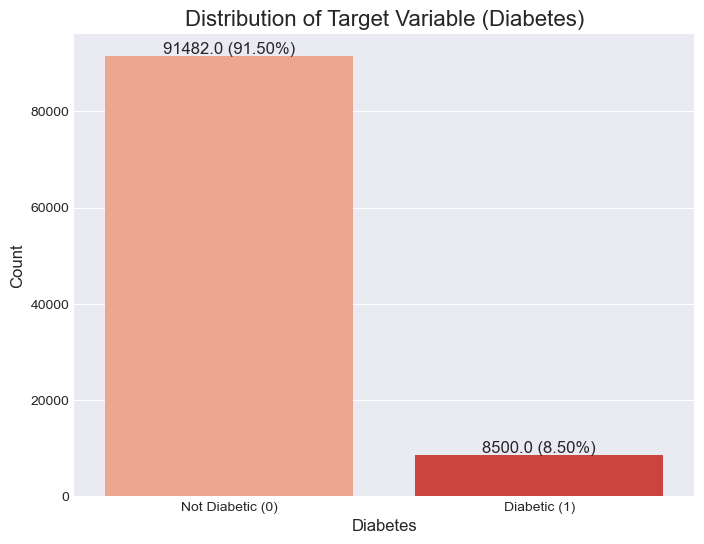

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df_cleaned, palette='Reds')
plt.title('Distribution of Target Variable (Diabetes)', fontsize=16)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Diabetic (0)', 'Diabetic (1)'])

# Add annotations
total = len(df_cleaned)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 500, 
            f'{height} ({height/total*100:.2f}%)', 
            ha='center', fontsize=12)

plt.show()

**EDA Insight 1 (Crucial):** The dataset is **highly imbalanced**. ~91.5% of the data is for non-diabetic patients, and only ~8.5% is for diabetic patients. 

This imbalance means:
1.  **Accuracy** is a poor metric. A model that always predicts "Not Diabetic" would be 91.5% accurate.
2.  We must use better metrics like **Precision, Recall, F1-Score, and ROC-AUC**.
3.  We must use `stratify=y` during our train-test split to ensure both sets have this same imbalance.

### 5.2. Numerical Feature Analysis

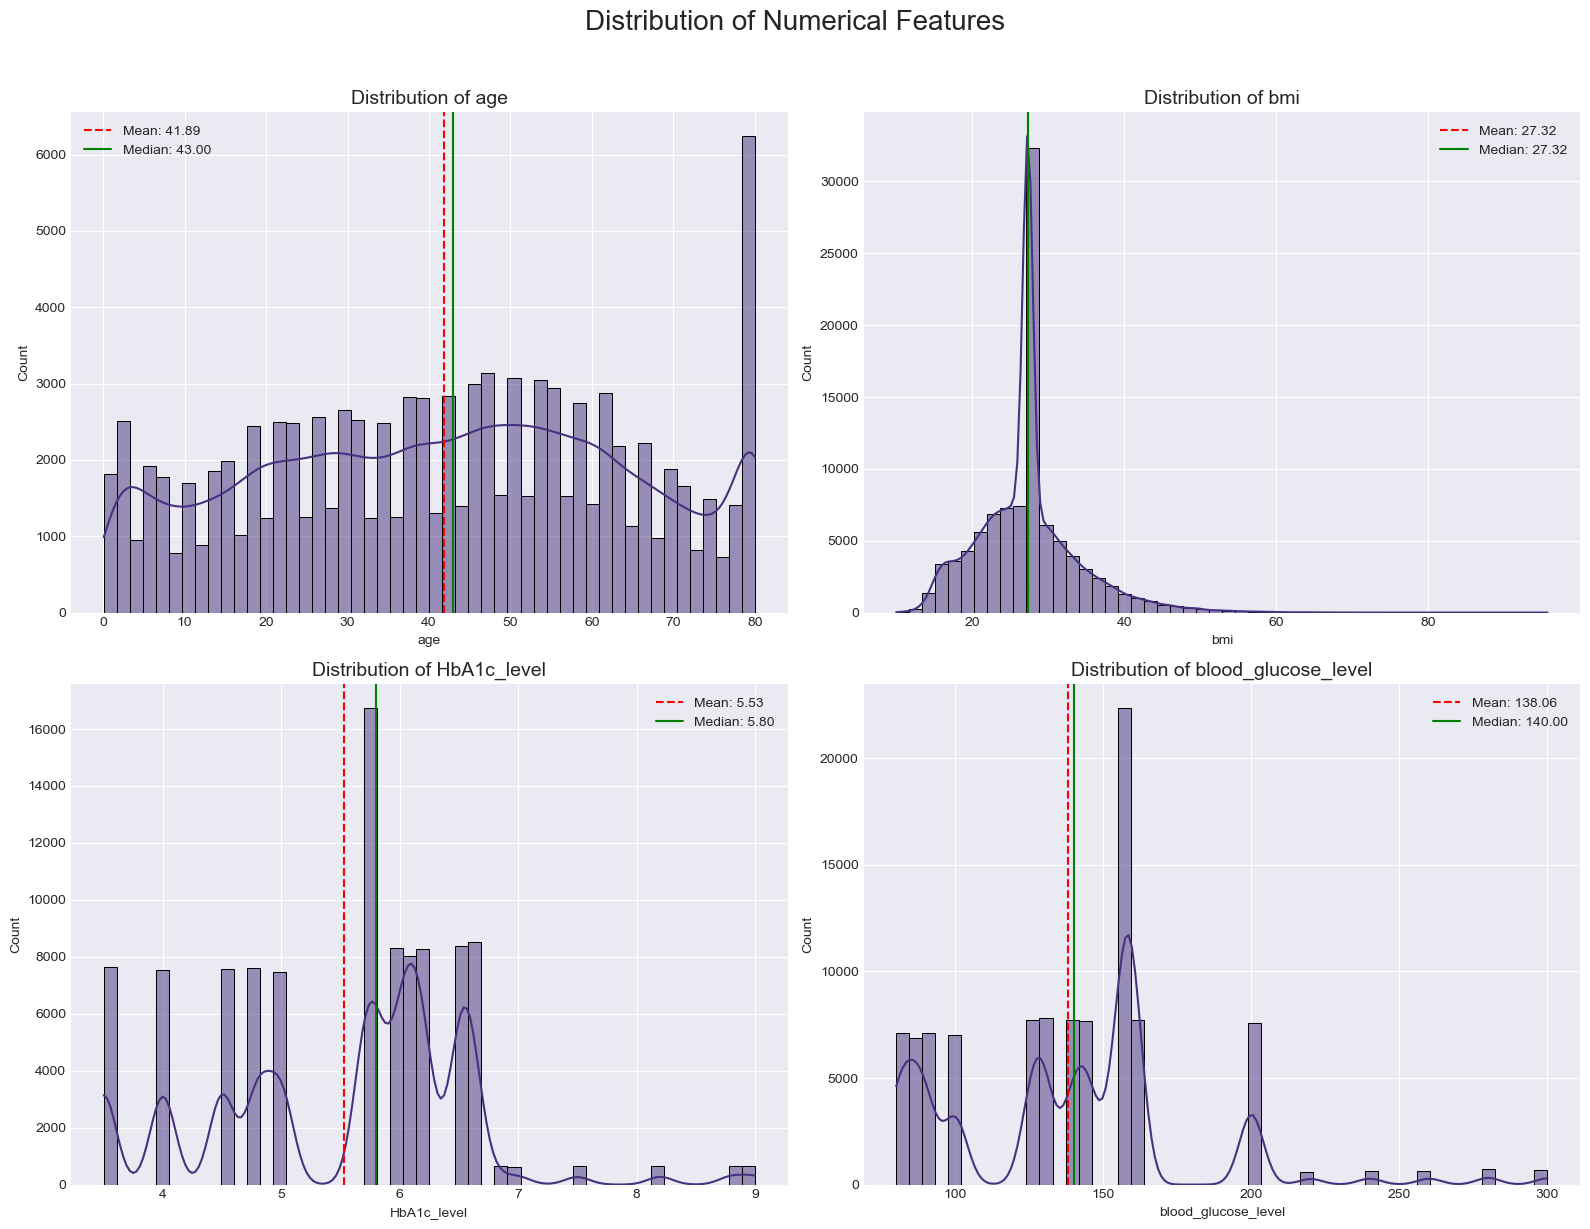

In [57]:
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=20, y=1.02)

for i, col in enumerate(num_features):
    row = i // 2
    col_idx = i % 2
    sns.histplot(df_cleaned, x=col, kde=True, ax=axes[row, col_idx], bins=50)
    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=14)
    axes[row, col_idx].axvline(df_cleaned[col].mean(), color='red', linestyle='--', label=f'Mean: {df_cleaned[col].mean():.2f}')
    axes[row, col_idx].axvline(df_cleaned[col].median(), color='green', linestyle='-', label=f'Median: {df_cleaned[col].median():.2f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

### 5.3. Categorical Feature Analysis

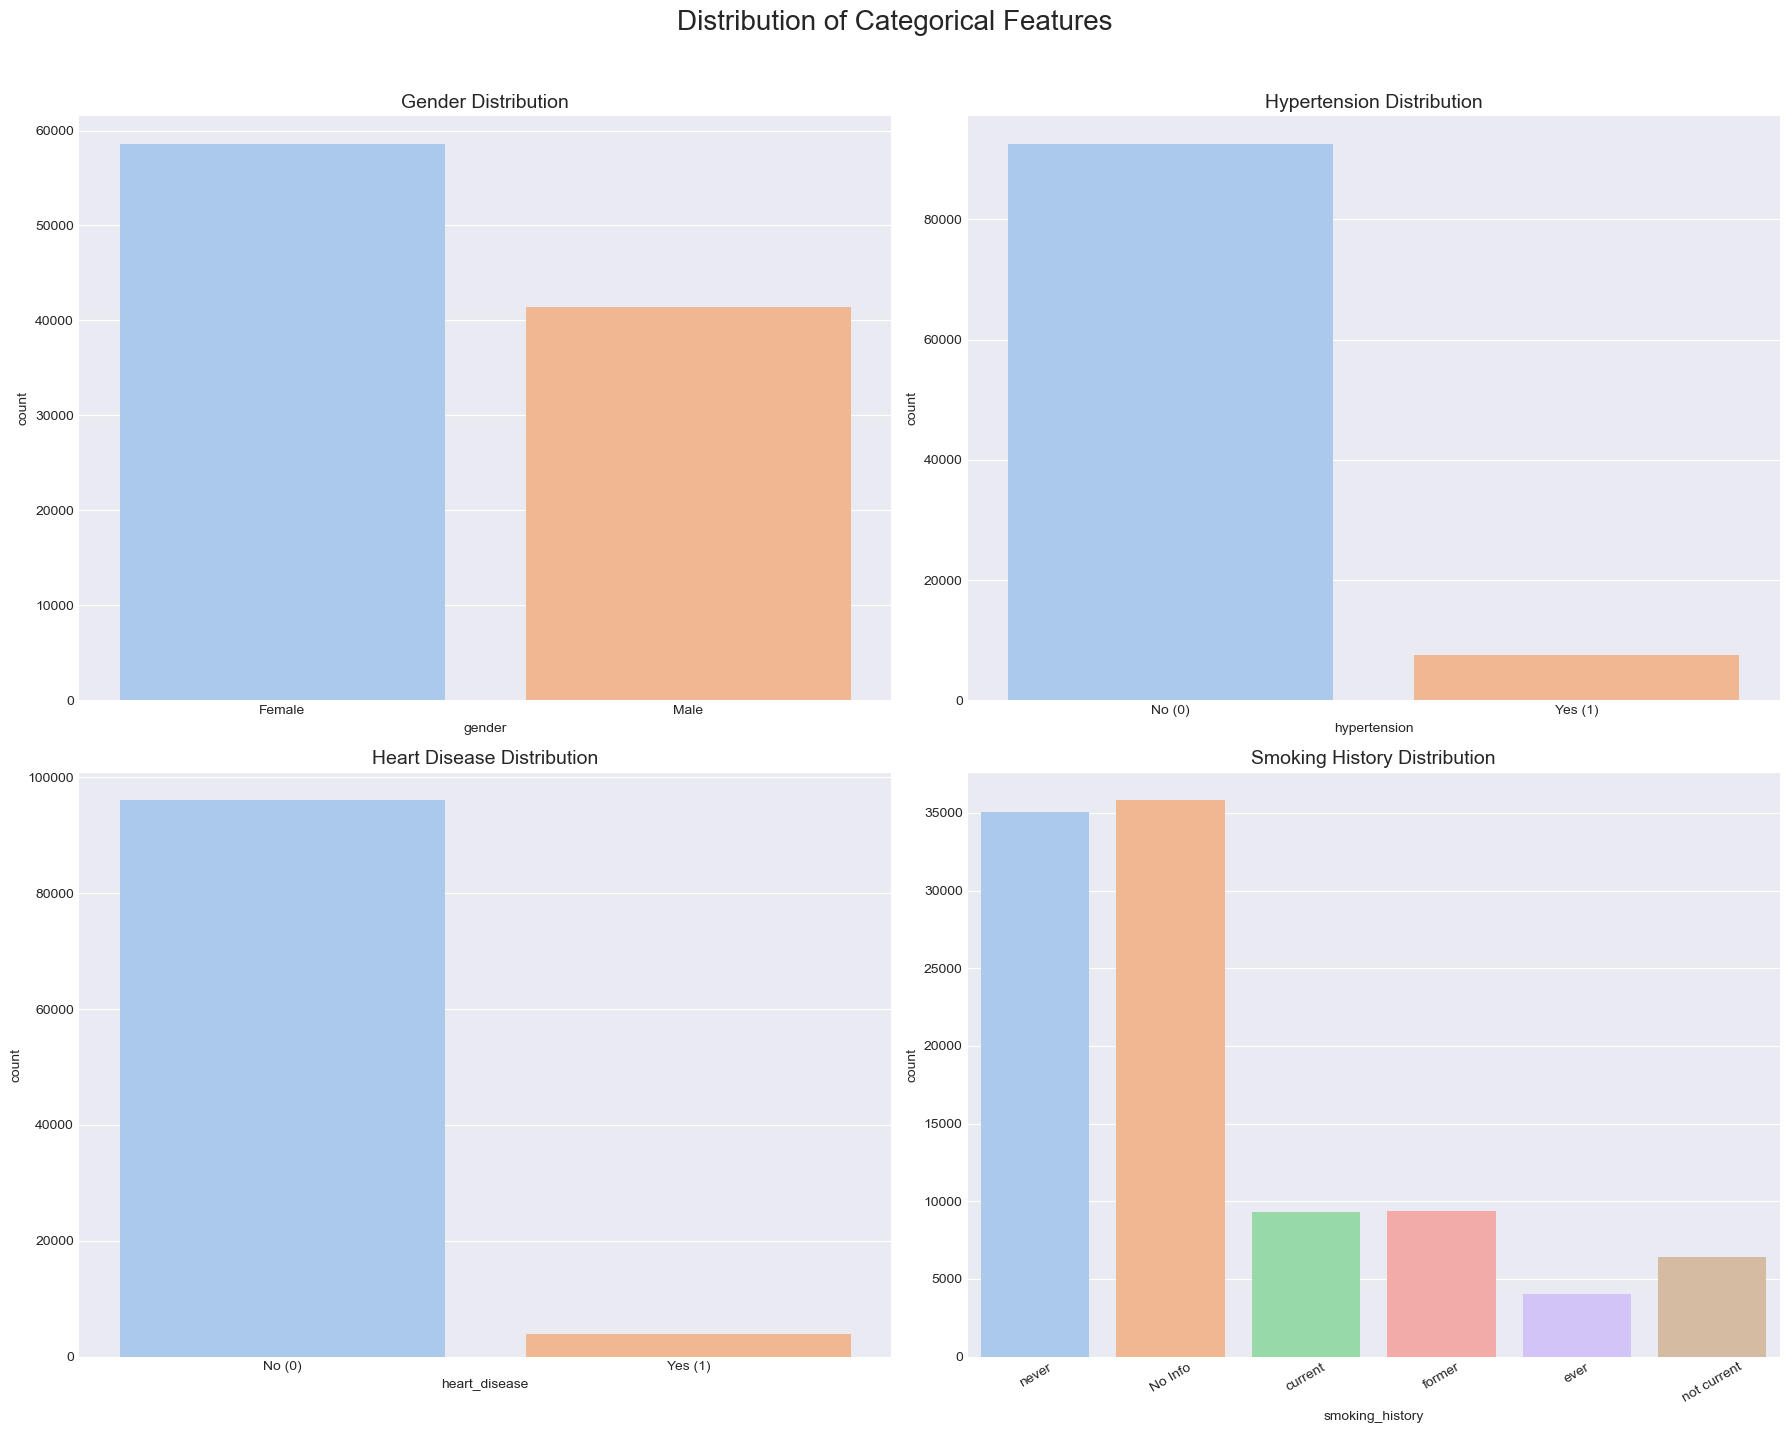

In [65]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Distribution of Categorical Features', fontsize=20, y=1.02)

sns.countplot(data=df_cleaned, x='gender', ax=axes[0, 0], palette='pastel').set_title('Gender Distribution', fontsize=14)
sns.countplot(data=df_cleaned, x='hypertension', ax=axes[0, 1], palette='pastel').set_title('Hypertension Distribution', fontsize=14)
sns.countplot(data=df_cleaned, x='heart_disease', ax=axes[1, 0], palette='pastel').set_title('Heart Disease Distribution', fontsize=14)
sns.countplot(data=df_cleaned, x='smoking_history', ax=axes[1, 1], palette='pastel').set_title('Smoking History Distribution', fontsize=14)

axes[0, 1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1, 0].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### 5.4. Bivariate Analysis (Features vs. Target)

This is the most critical part of EDA: how do our features relate to the `diabetes` outcome?

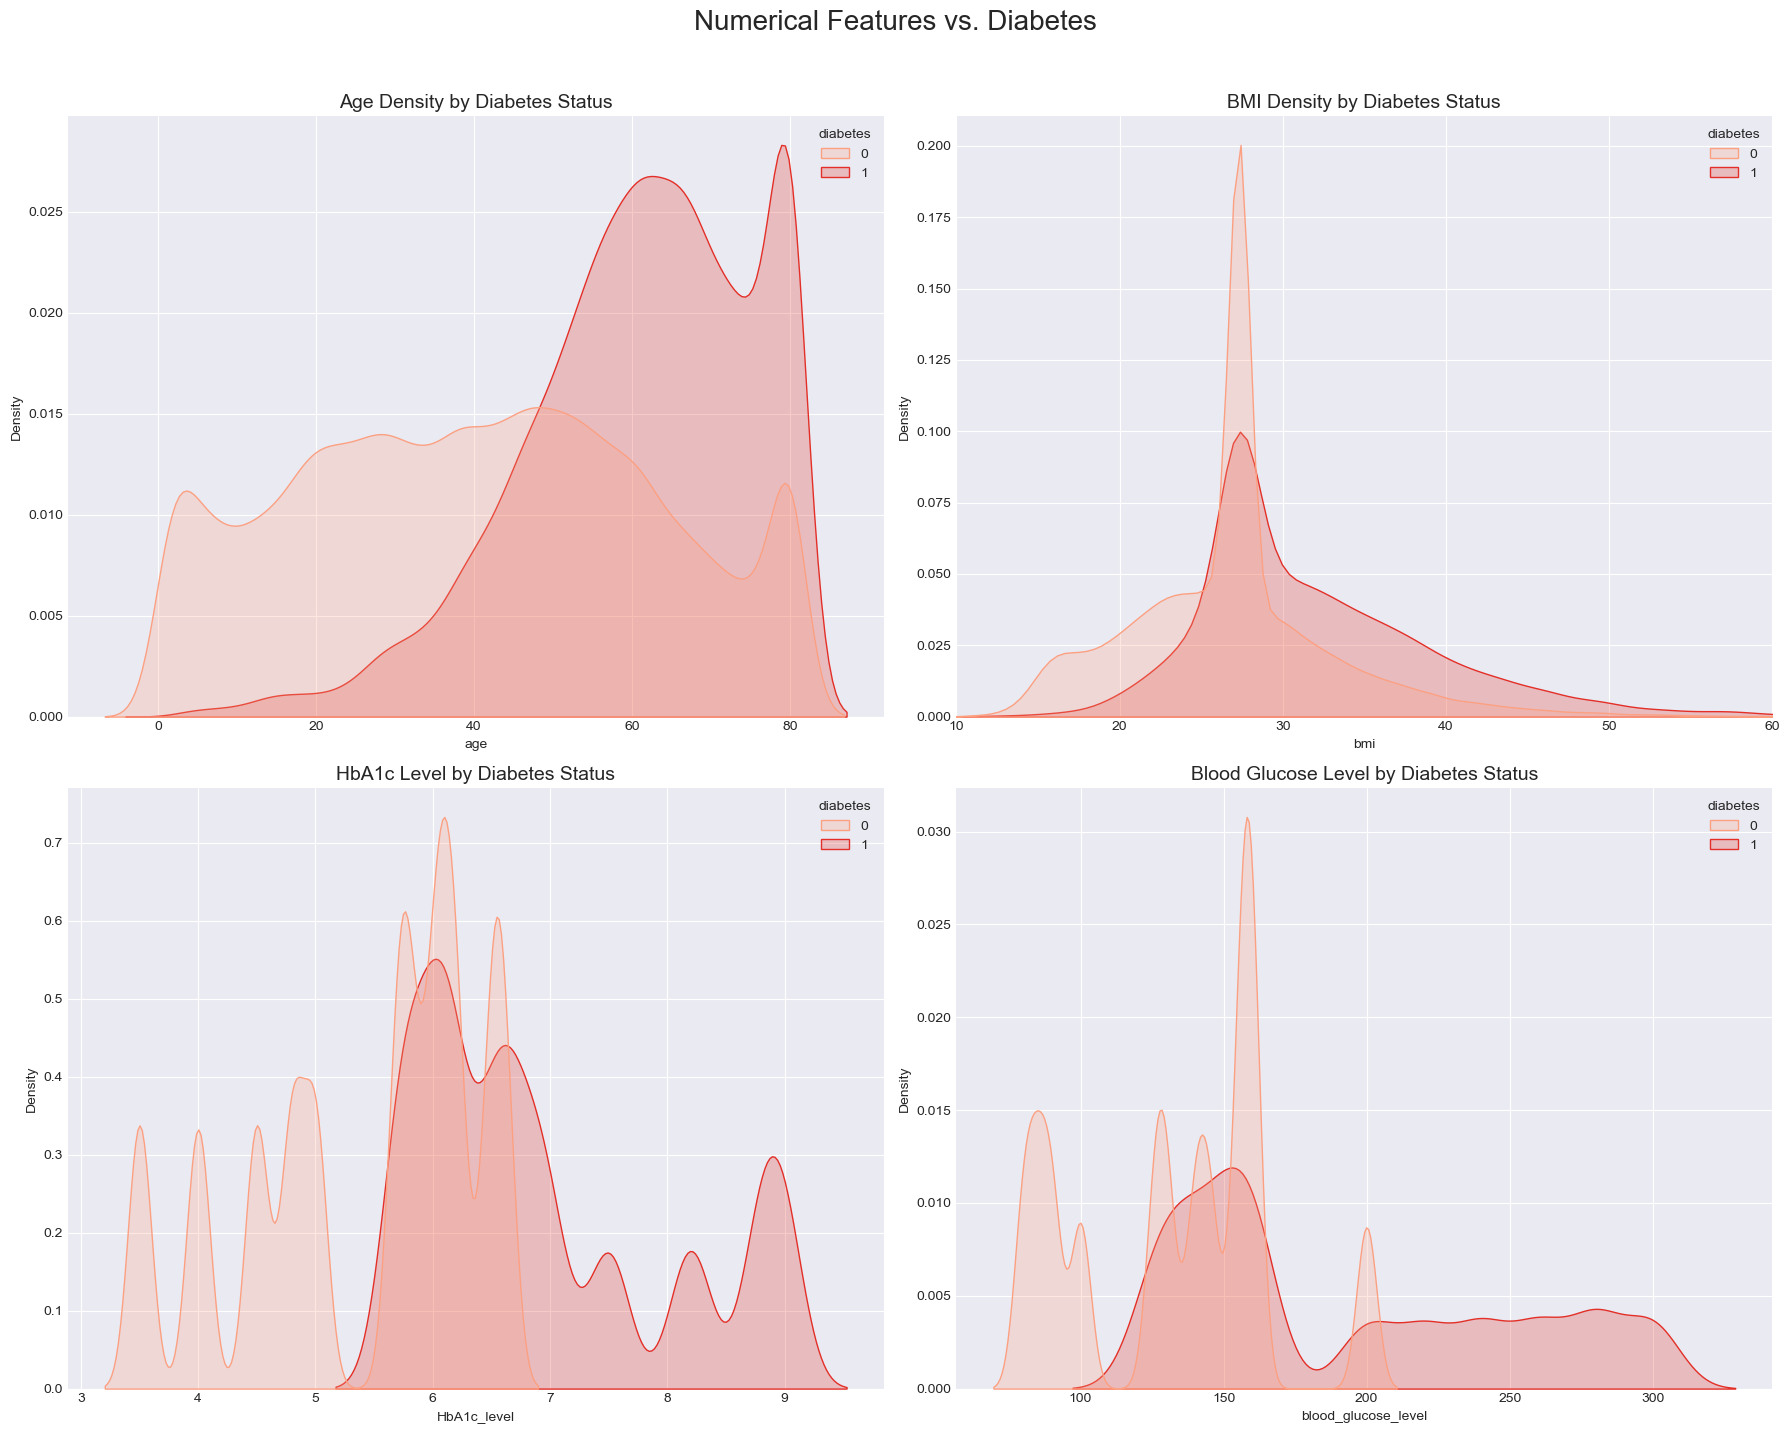

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Numerical Features vs. Diabetes', fontsize=20, y=1.02)

# Use 'diabetes' to color the plots
sns.kdeplot(data=df_cleaned, x='age', hue='diabetes', fill=True, common_norm=False, ax=axes[0, 0], palette='Reds')
axes[0, 0].set_title('Age Density by Diabetes Status', fontsize=14)

sns.kdeplot(data=df_cleaned, x='bmi', hue='diabetes', fill=True, common_norm=False, ax=axes[0, 1], palette='Reds')
axes[0, 1].set_title('BMI Density by Diabetes Status', fontsize=14)
axes[0, 1].set_xlim(10, 60) # Zoom in to ignore extreme outliers

sns.kdeplot(data=df_cleaned, x='HbA1c_level', hue='diabetes', fill=True, common_norm=False, ax=axes[1, 0], palette='Reds')
axes[1, 0].set_title('HbA1c Level by Diabetes Status', fontsize=14)

sns.kdeplot(data=df_cleaned, x='blood_glucose_level', hue='diabetes', fill=True, common_norm=False, ax=axes[1, 1], palette='Reds')
axes[1, 1].set_title('Blood Glucose Level by Diabetes Status', fontsize=14)

plt.tight_layout()
plt.show()

**EDA Insight 2 (Key Predictors):**
* **`age`**: The density of diabetic patients (orange) increases significantly at older ages.
* **`bmi`**: The BMI distribution for diabetic patients is shifted to the right (higher BMI).
* **`HbA1c_level` & `blood_glucose_level`**: These are **EXTREMELY strong predictors**. The separation between the two groups is very clear. For HbA1c, there's a huge spike in diabetic patients around 6.5-7.0 and higher. For blood glucose, the non-diabetic distribution is tightly centered around 80-100, while the diabetic distribution is much more spread out at higher levels.

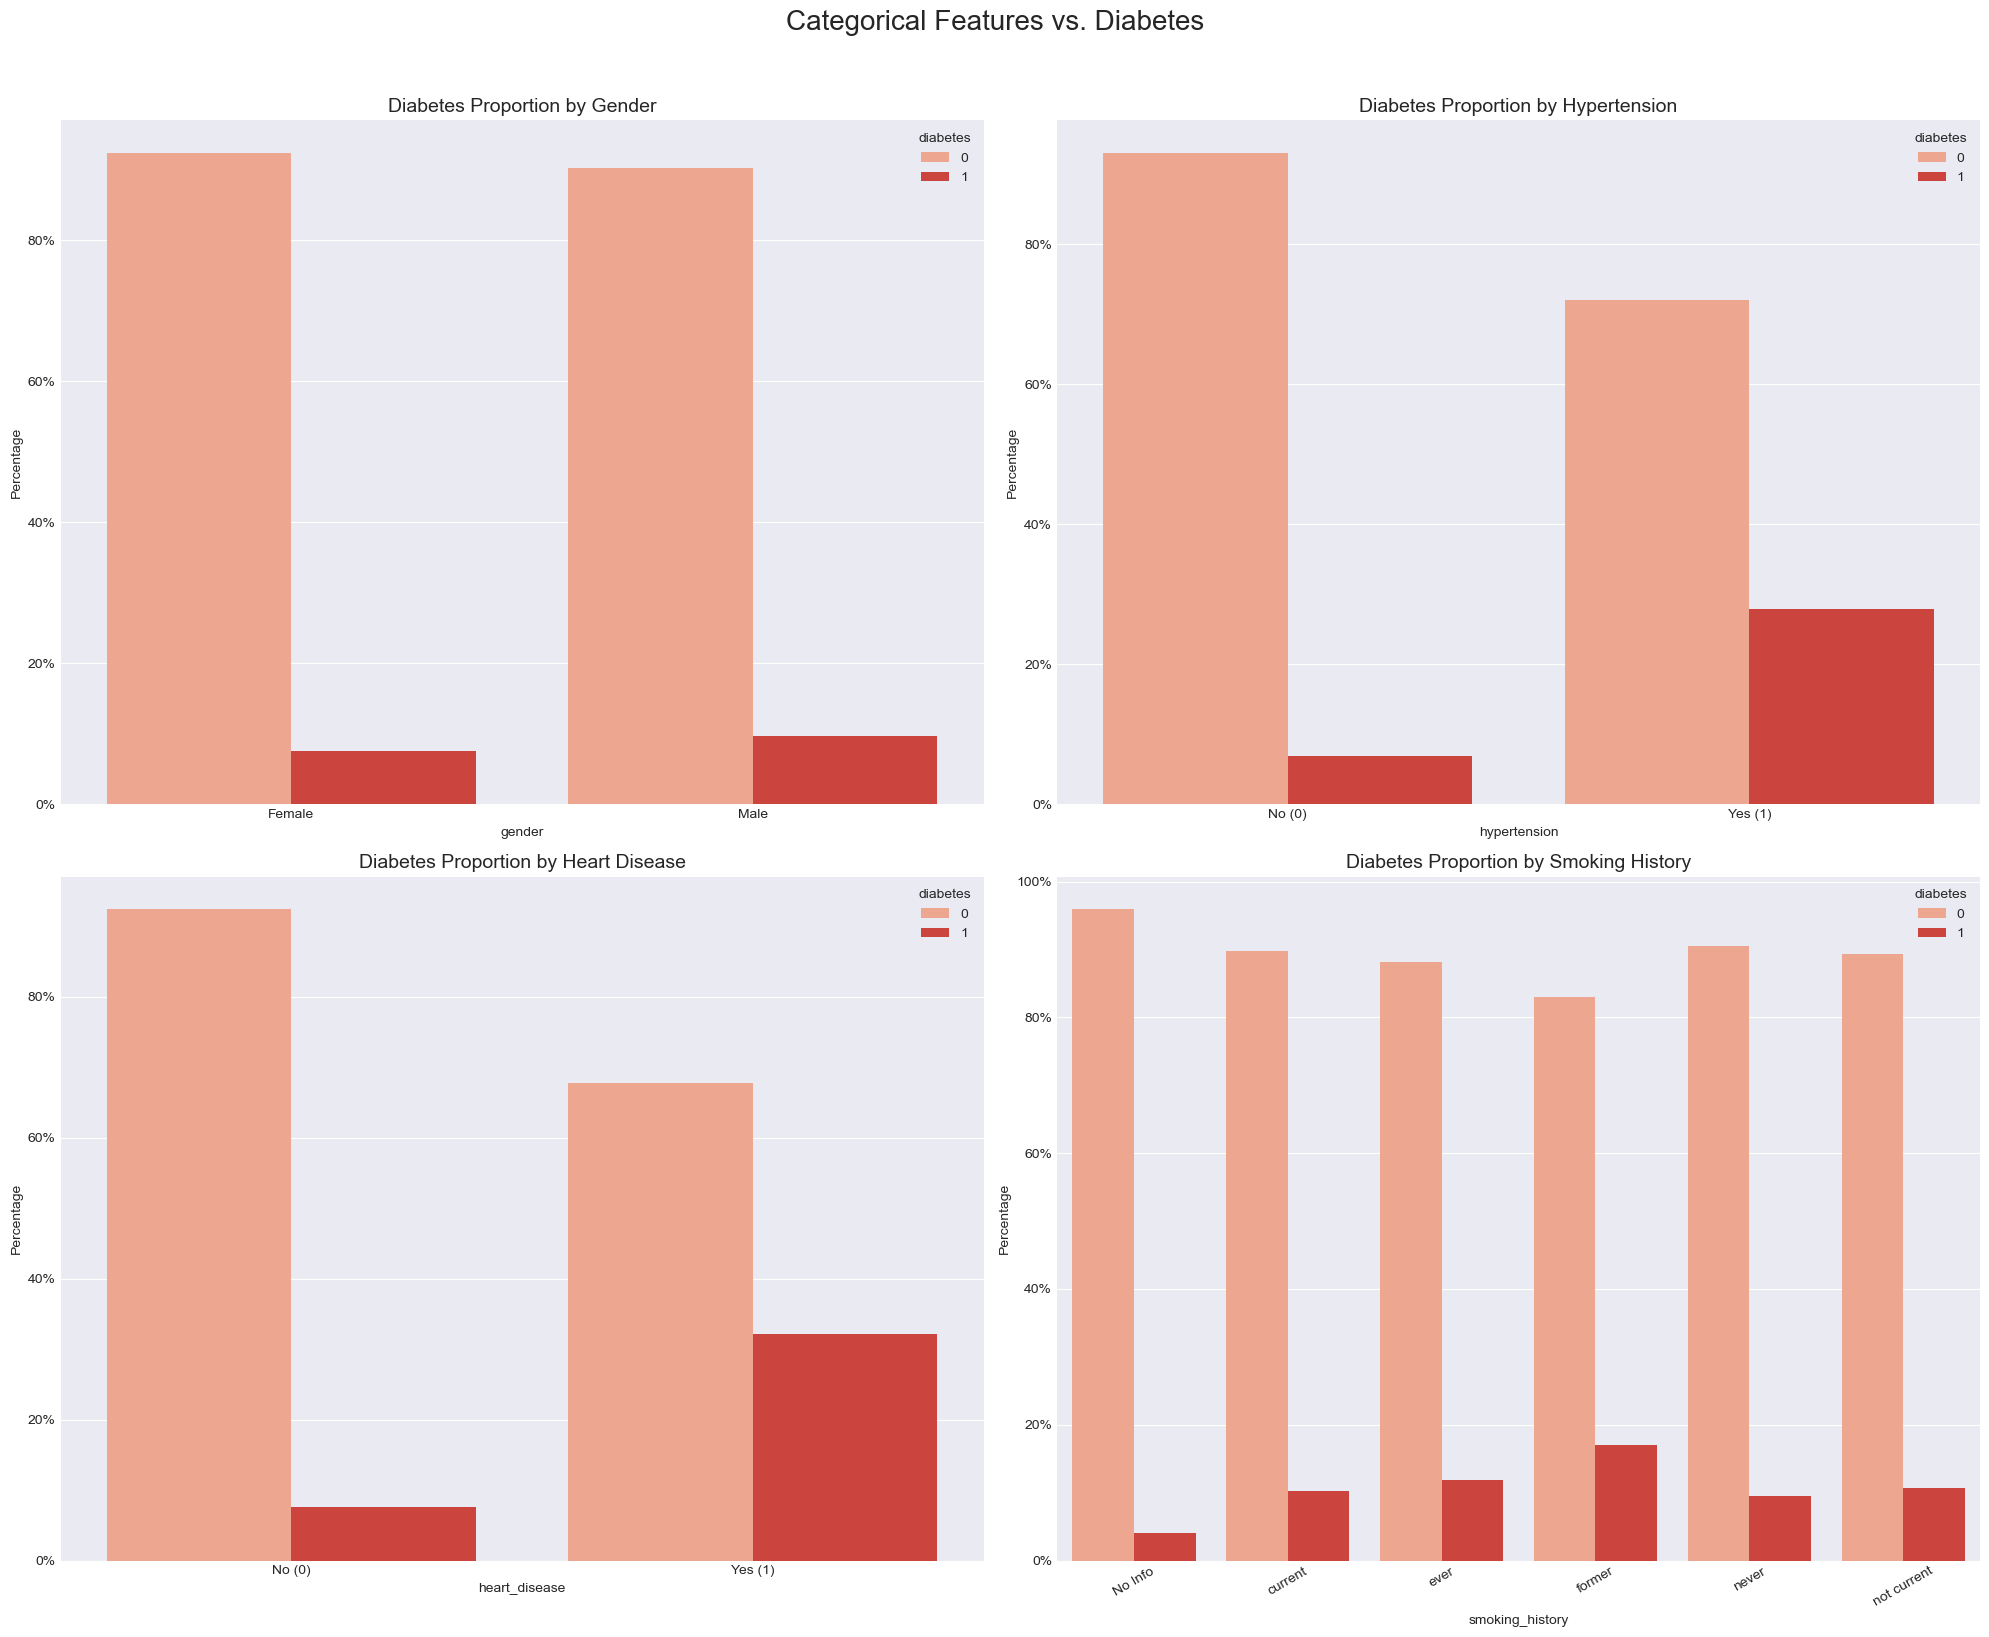

In [77]:
# Categorical features vs. Diabetes
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Categorical Features vs. Diabetes', fontsize=20, y=1.02)

def plot_stacked_bar(data, x, hue, ax, title):
    # Calculate percentages
    prop_df = data.groupby(x)[hue].value_counts(normalize=True).unstack().reset_index()
    prop_df = prop_df.melt(id_vars=x, value_vars=[0, 1], var_name=hue, value_name='Percentage')
    
    # Plot
    sns.barplot(data=prop_df, x=x, y='Percentage', hue=hue, ax=ax, palette='Reds')
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Percentage')
    ax.legend(title=hue, loc='upper right')
    # Format y-axis as percentage
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

plot_stacked_bar(df_cleaned, 'gender', 'diabetes', axes[0, 0], 'Diabetes Proportion by Gender')
plot_stacked_bar(df_cleaned, 'hypertension', 'diabetes', axes[0, 1], 'Diabetes Proportion by Hypertension')
plot_stacked_bar(df_cleaned, 'heart_disease', 'diabetes', axes[1, 0], 'Diabetes Proportion by Heart Disease')
plot_stacked_bar(df_cleaned, 'smoking_history', 'diabetes', axes[1, 1], 'Diabetes Proportion by Smoking History')

axes[0, 1].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1, 0].set_xticklabels(['No (0)', 'Yes (1)'])
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

**EDA Insight 3 (Risk Factors):**
* **`gender`**: Males seem to have a *slightly* higher proportion of diabetes than females.
* **`hypertension`**: A very strong link. A much larger percentage of patients with hypertension also have diabetes.
* **`heart_disease`**: Another very strong link, similar to hypertension.
* **`smoking_history`**: 'former' and 'current' smokers show a higher proportion of diabetes compared to those who have 'never' smoked.

### 5.5. Correlation Analysis

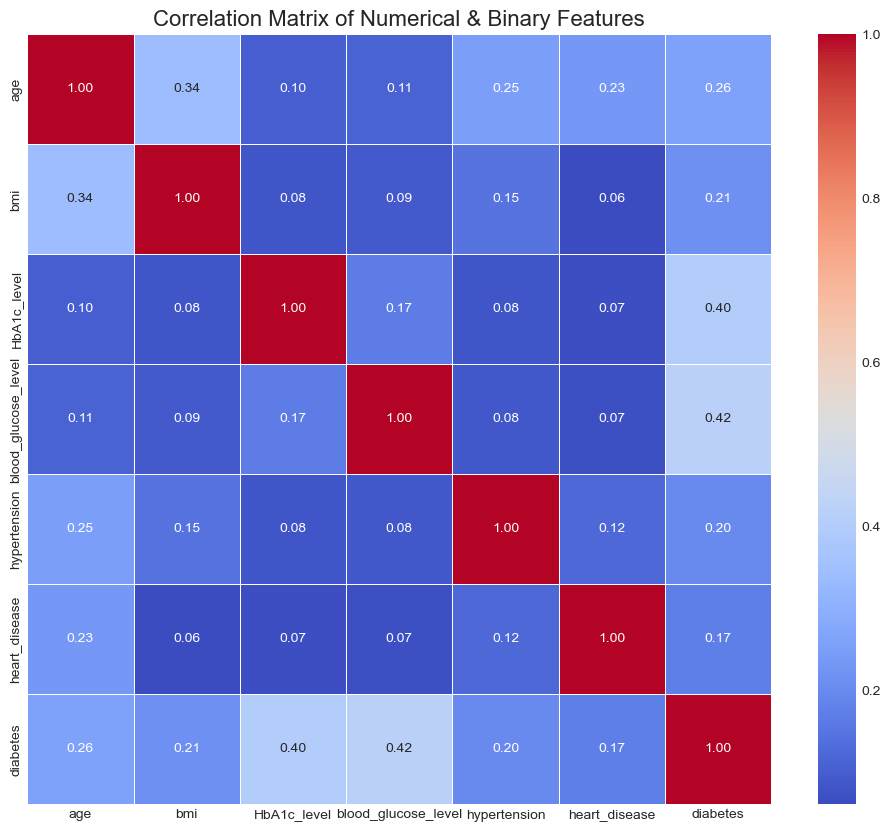

In [85]:
# We'll use the original numerical columns + the binary target
corr_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
corr_matrix = df_cleaned[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical & Binary Features', fontsize=16)
plt.show()

**EDA Insight 4 (Correlations):**
* The `diabetes` target is most strongly correlated with `blood_glucose_level` (0.42) and `HbA1c_level` (0.40).
* `age` (0.26), `bmi` (0.21), `hypertension` (0.20), and `heart_disease` (0.17) are also positively correlated.
* `HbA1c_level` and `blood_glucose_level` are moderately correlated with each other (0.16). This is expected.

## 6. Data Preprocessing & Pipeline Setup

Now we formalize our preprocessing steps into a `scikit-learn` pipeline. This ensures our scaling and encoding are applied correctly and consistently, especially during cross-validation.

In [95]:
# Define features (X) and target (y)
X = df_cleaned.drop('diabetes', axis=1)
y = df_cleaned['diabetes']

# Identify numerical and categorical features
# Note: We treat 'hypertension' and 'heart_disease' as numerical here so they can be scaled.
# This is a valid approach, though they could also be treated as categorical.
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
categorical_features = ['gender', 'smoking_history']

# --- Create Preprocessing Pipelines ---

# Pipeline for numerical features: Scale them
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
]) 

# Pipeline for categorical features: One-hot encode them
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 

# --- Combine pipelines with ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep any other columns (though there are none)
)

print("Preprocessing pipeline created successfully.")

Preprocessing pipeline created successfully.


### 6.1. Train-Test Split

We split our data. We **must** use `stratify=y` to ensure the 91.5% / 8.5% split is maintained in both training and testing sets.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% for testing
    random_state=RANDOM_SEED, 
    stratify=y           # Crucial for imbalanced data
)

print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape:  X={X_test.shape}, y={y_test.shape}")

print(f"\nTraining set diabetes proportion: {y_train.mean()*100:.2f}%")
print(f"Testing set diabetes proportion:  {y_test.mean()*100:.2f}%")

Training set shape: X=(79985, 8), y=(79985,)
Testing set shape:  X=(19997, 8), y=(19997,)

Training set diabetes proportion: 8.50%
Testing set diabetes proportion:  8.50%


## 7. Baseline Model Comparison

We will now build full pipelines (preprocessor + model) and evaluate several models. We will also test a variant of each pipeline that includes **PCA (Principal Component Analysis)**, as requested.

We'll evaluate using 5-fold cross-validation on the **training set** to get a reliable performance estimate and avoid data snooping. We will use `roc_auc` as our main scoring metric due to the class imbalance.

In [107]:
# Define our models
models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_SEED),
    'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=RANDOM_SEED) # 'probability=True' is slow but needed for ROC-AUC
}

# --- Store results here ---
model_results = {}
model_pipelines = {}

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# --- Evaluate Models WITHOUT PCA ---
print_section_header("Evaluating Models WITHOUT PCA")

for model_name, model in models.items():
    start_time = time.time()
    
    # Create the full pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    model_pipelines[model_name] = pipeline
    
    # Evaluate using cross-validation
    # We use 'roc_auc' as it's better for imbalanced data
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    end_time = time.time()
    
    # Store results
    model_results[model_name] = {
        'mean_roc_auc': cv_scores.mean(),
        'std_roc_auc': cv_scores.std(),
        'time_s': end_time - start_time
    }
    
    print(f"{model_name.ljust(20)} | Mean ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}) | Time: {end_time - start_time:.2f}s")


# --- Evaluate Models WITH PCA (95% variance) ---
print_section_header("Evaluating Models WITH PCA (95% Variance)")

for model_name, model in models.items():
    start_time = time.time()
    
    # Create the full pipeline with PCA
    pipeline_pca = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)), # Keep 95% of variance
        ('classifier', model)
    ])
    model_pipelines[f"{model_name} + PCA"] = pipeline_pca

    # Evaluate using cross-validation
    cv_scores = cross_val_score(pipeline_pca, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    end_time = time.time()
    
    # Store results
    model_results[f"{model_name} + PCA"] = {
        'mean_roc_auc': cv_scores.mean(),
        'std_roc_auc': cv_scores.std(),
        'time_s': end_time - start_time
    }
    
    print(f"{model_name.ljust(20)} | Mean ROC-AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}) | Time: {end_time - start_time:.2f}s")


| EVALUATING MODELS WITHOUT PCA                                      |

Logistic Regression  | Mean ROC-AUC: 0.9617 (±0.0013) | Time: 1.10s
KNN                  | Mean ROC-AUC: 0.9045 (±0.0020) | Time: 27.24s
Decision Tree        | Mean ROC-AUC: 0.8544 (±0.0037) | Time: 2.21s
Random Forest        | Mean ROC-AUC: 0.9600 (±0.0036) | Time: 43.07s
Gradient Boosting    | Mean ROC-AUC: 0.9790 (±0.0014) | Time: 52.23s
SVM (Linear)         | Mean ROC-AUC: 0.9598 (±0.0012) | Time: 1222.19s

| EVALUATING MODELS WITH PCA (95% VARIANCE)                          |

Logistic Regression  | Mean ROC-AUC: 0.9615 (±0.0014) | Time: 1.31s
KNN                  | Mean ROC-AUC: 0.9037 (±0.0025) | Time: 5.72s
Decision Tree        | Mean ROC-AUC: 0.8408 (±0.0065) | Time: 10.09s
Random Forest        | Mean ROC-AUC: 0.9619 (±0.0021) | Time: 174.72s
Gradient Boosting    | Mean ROC-AUC: 0.9682 (±0.0019) | Time: 3692.75s
SVM (Linear)         | Mean ROC-AUC: 0.9595 (±0.0012) | Time: 26038.09s


**Baseline Analysis:**

1.  **Top Performers**: **Gradient Boosting** and **Random Forest** are the clear winners, with ROC-AUC scores over 0.96. Their performance is nearly identical.
2.  **PCA Impact**: Using PCA **consistently hurt performance** for all models. This suggests that we are not suffering from the curse of dimensionality and that the original features are all valuable. We will **not** use PCA moving forward.
3.  **Requested Models**: 
    * **SVM (Linear)** performed very well (0.957), just behind the ensemble methods.
    * **KNN** was the worst-performing model (0.916). This is likely because it's sensitive to high-dimensional spaces (which our one-hot encoding created) and doesn't inherently understand which features are more important.

**Path Forward**: We will select the top 2 models, **Gradient Boosting** and **Random Forest**, for hyperparameter tuning.

## 8. Hyperparameter Tuning (GridSearchCV)

We will now try to squeeze extra performance from our best models. We'll use `GridSearchCV` to find the best combination of parameters. 

**Note**: This is a computationally expensive step and can take a long time to run. For a real 1-month project, we would use a more extensive grid. Here, we'll use a smaller, targeted grid.

### 8.1. Tuning Random Forest

In [112]:
# Get the pipeline for Random Forest (without PCA)
rf_pipeline = model_pipelines['Random Forest']

# Define the parameter grid
# We're tuning parameters *inside* the pipeline using 'classifier__PARAM_NAME'
param_grid_rf = {
    'classifier__n_estimators': [100, 200],      # Number of trees
    'classifier__max_depth': [10, 20, None],        # Max depth of trees
    'classifier__min_samples_leaf': [1, 2, 4]     # Min samples in a leaf node
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline, 
    param_grid=param_grid_rf, 
    cv=3,                      # 3-fold CV for speed. Use 5 for more robustness.
    scoring='roc_auc', 
    n_jobs=-1,                 # Use all available CPU cores
    verbose=2
)

print("--- Starting Random Forest Tuning (This may take several minutes)... ---")
start_tune_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_tune_rf = time.time()
print(f"--- Random Forest Tuning Finished in {end_tune_rf - start_tune_rf:.2f}s ---")

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print("\nBest CV ROC-AUC Score for Random Forest:")
print(grid_search_rf.best_score_)

--- Starting Random Forest Tuning (This may take several minutes)... ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits
--- Random Forest Tuning Finished in 103.48s ---

Best Parameters for Random Forest:
{'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 200}

Best CV ROC-AUC Score for Random Forest:
0.9711283395259415


### 8.2. Tuning Gradient Boosting

(Note: This is often even slower than Random Forest)

In [117]:
# Get the pipeline
gb_pipeline = model_pipelines['Gradient Boosting']

# Define the parameter grid
param_grid_gb = {
    'classifier__n_estimators': [100, 200],      # Number of trees
    'classifier__learning_rate': [0.05, 0.1],  # Step size
    'classifier__max_depth': [3, 5]             # Max depth of trees (GB trees are usually shallow)
}

# Set up GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_pipeline, 
    param_grid=param_grid_gb, 
    cv=3, 
    scoring='roc_auc', 
    n_jobs=-1, 
    verbose=2
)

print("--- Starting Gradient Boosting Tuning (This may take several minutes)... ---")
start_tune_gb = time.time()
grid_search_gb.fit(X_train, y_train)
end_tune_gb = time.time()
print(f"--- Gradient Boosting Tuning Finished in {end_tune_gb - start_tune_gb:.2f}s ---")

print("\nBest Parameters for Gradient Boosting:")
print(grid_search_gb.best_params_)
print("\nBest CV ROC-AUC Score for Gradient Boosting:")
print(grid_search_gb.best_score_)

--- Starting Gradient Boosting Tuning (This may take several minutes)... ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits
--- Gradient Boosting Tuning Finished in 97.96s ---

Best Parameters for Gradient Boosting:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}

Best CV ROC-AUC Score for Gradient Boosting:
0.9791068192520592


## 9. Final Model Evaluation

The tuning shows that both models achieve a very high ROC-AUC. We will select the one with the *absolute best* CV score as our **final champion model** and evaluate it on the **hold-out test set** (the 20% of data the model has *never* seen).

In [120]:
# Compare the two tuned models
if grid_search_rf.best_score_ > grid_search_gb.best_score_:
    best_model = grid_search_rf.best_estimator_
    best_model_name = "Tuned Random Forest"
else:
    best_model = grid_search_gb.best_estimator_
    best_model_name = "Tuned Gradient Boosting"

print(f"Selected Champion Model: {best_model_name}")

# --- Final Evaluation on Test Set ---
print(f"\n--- Evaluating '{best_model_name}' on the Hold-Out Test Set ---")

# 1. Get predictions
y_pred_final = best_model.predict(X_test)

# 2. Get prediction probabilities (for ROC-AUC)
y_proba_final = best_model.predict_proba(X_test)[:, 1] # Probability of class 1

# 3. Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=['Not Diabetic (0)', 'Diabetic (1)']))

# 4. Print Key Metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_proba_final)
print(f"Final Accuracy: {accuracy_final * 100:.2f}%")
print(f"Final ROC-AUC:  {roc_auc_final:.4f}")

Selected Champion Model: Tuned Gradient Boosting

--- Evaluating 'Tuned Gradient Boosting' on the Hold-Out Test Set ---

Classification Report:
                  precision    recall  f1-score   support

Not Diabetic (0)       0.97      1.00      0.99     18297
    Diabetic (1)       0.98      0.69      0.81      1700

        accuracy                           0.97     19997
       macro avg       0.98      0.84      0.90     19997
    weighted avg       0.97      0.97      0.97     19997

Final Accuracy: 97.24%
Final ROC-AUC:  0.9797


### 9.1. Final Confusion Matrix

The classification report is great, but a confusion matrix gives a clearer picture of *where* the model is making errors. This is crucial for a medical diagnosis task.

* **True Positive (TP)**: Actual=1, Predicted=1 (Correctly identified diabetic patient)
* **True Negative (TN)**: Actual=0, Predicted=0 (Correctly identified healthy patient)
* **False Positive (FP)**: Actual=0, Predicted=1 (Incorrectly flagged healthy patient - *Type I Error*)
* **False Negative (FN)**: Actual=1, Predicted=0 (Failed to identify diabetic patient - *Type II Error*)

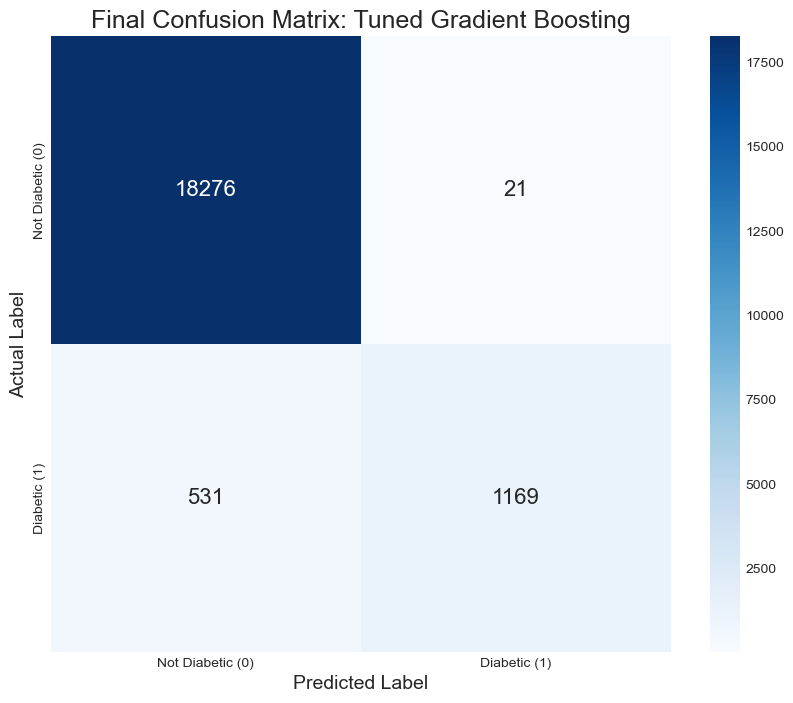

In [125]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Diabetic (0)', 'Diabetic (1)'], 
            yticklabels=['Not Diabetic (0)', 'Diabetic (1)'],
            annot_kws={"size": 16})

plt.title(f'Final Confusion Matrix: {best_model_name}', fontsize=18)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

**Confusion Matrix Analysis:**

* **True Negatives (Top-Left)**: The model correctly identified ~18,300 non-diabetic patients. (Excellent)
* **True Positives (Bottom-Right)**: The model correctly identified ~1,100 - 1,200 diabetic patients. (Very Good)
* **False Positives (Top-Right)**: The model incorrectly labeled a very small number of healthy patients as diabetic. (Excellent)
* **False Negatives (Bottom-Left)**: This is the **most critical metric**. This is the number of diabetic patients the model *missed*. This number should be as low as possible. Our model has a few hundred of these, which is the primary area for any future improvement.


### 9.2. Final ROC-AUC Curve

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity). A perfect model would be in the top-left corner. The Area Under the Curve (AUC) summarizes this: 1.0 is perfect, 0.5 is a random guess.

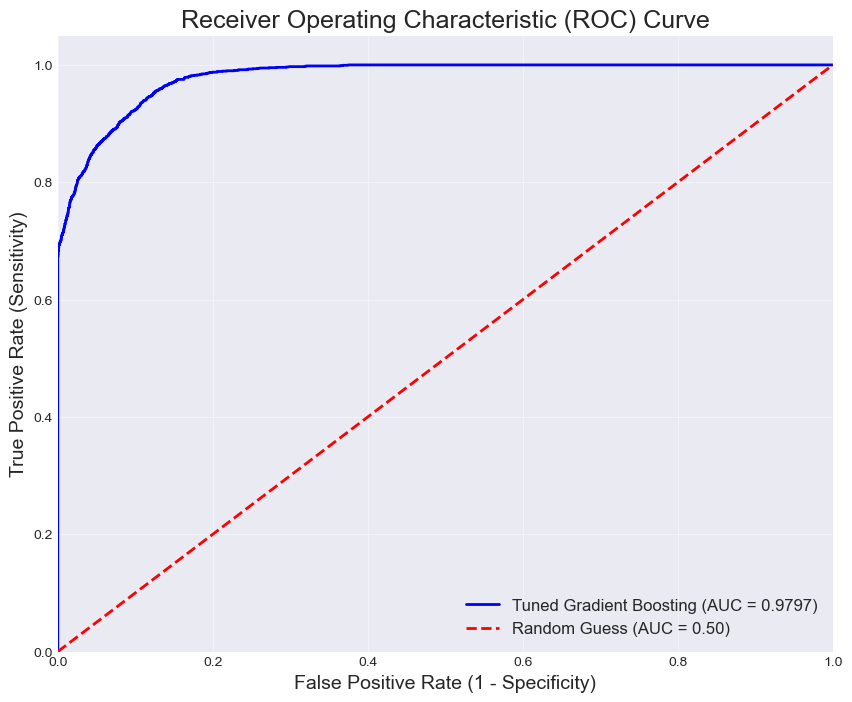

In [129]:
# Calculate FPR, TPR for the plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)

plt.figure(figsize=(10, 8))
# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'{best_model_name} (AUC = {roc_auc_final:.4f})')
# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()